In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
#importing the libraries as needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data into a dtaframe named df
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
#printing the first 3 rows of dataframe
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
# checking the datatypes for all the columns (feature + target) in the dataframe 
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**So we have 768 entries in our dataset, with all feature variables being numeric type**

In [7]:
# printing the summary statistics of the dataframe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# function to draw a histogram given dataframe, featurre name and x axis title name
def plot_hist(df,feature,axis_name):
    fig,ax = plt.subplots(figsize=(6,5))
    plt.hist(df[feature],bins=50)
    plt.xlabel(axis_name)
    plt.show()

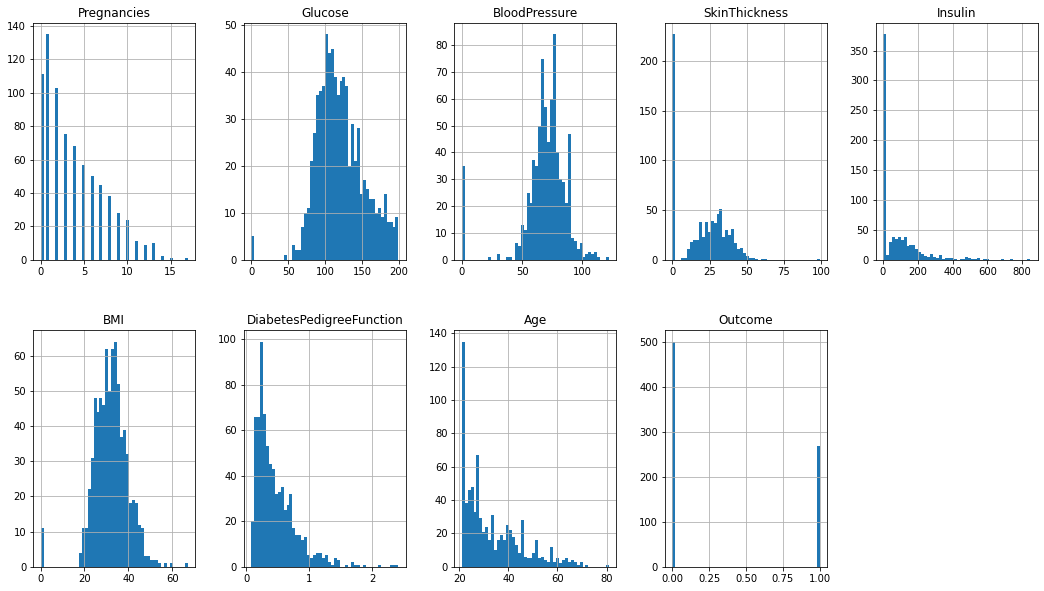

In [9]:
# plotting histogram for all the features in the dataframe, 
df.hist(figsize=(18,10),bins=50,layout=(2,5))
plt.show()    
    

In [10]:
col_list = list(df.columns)

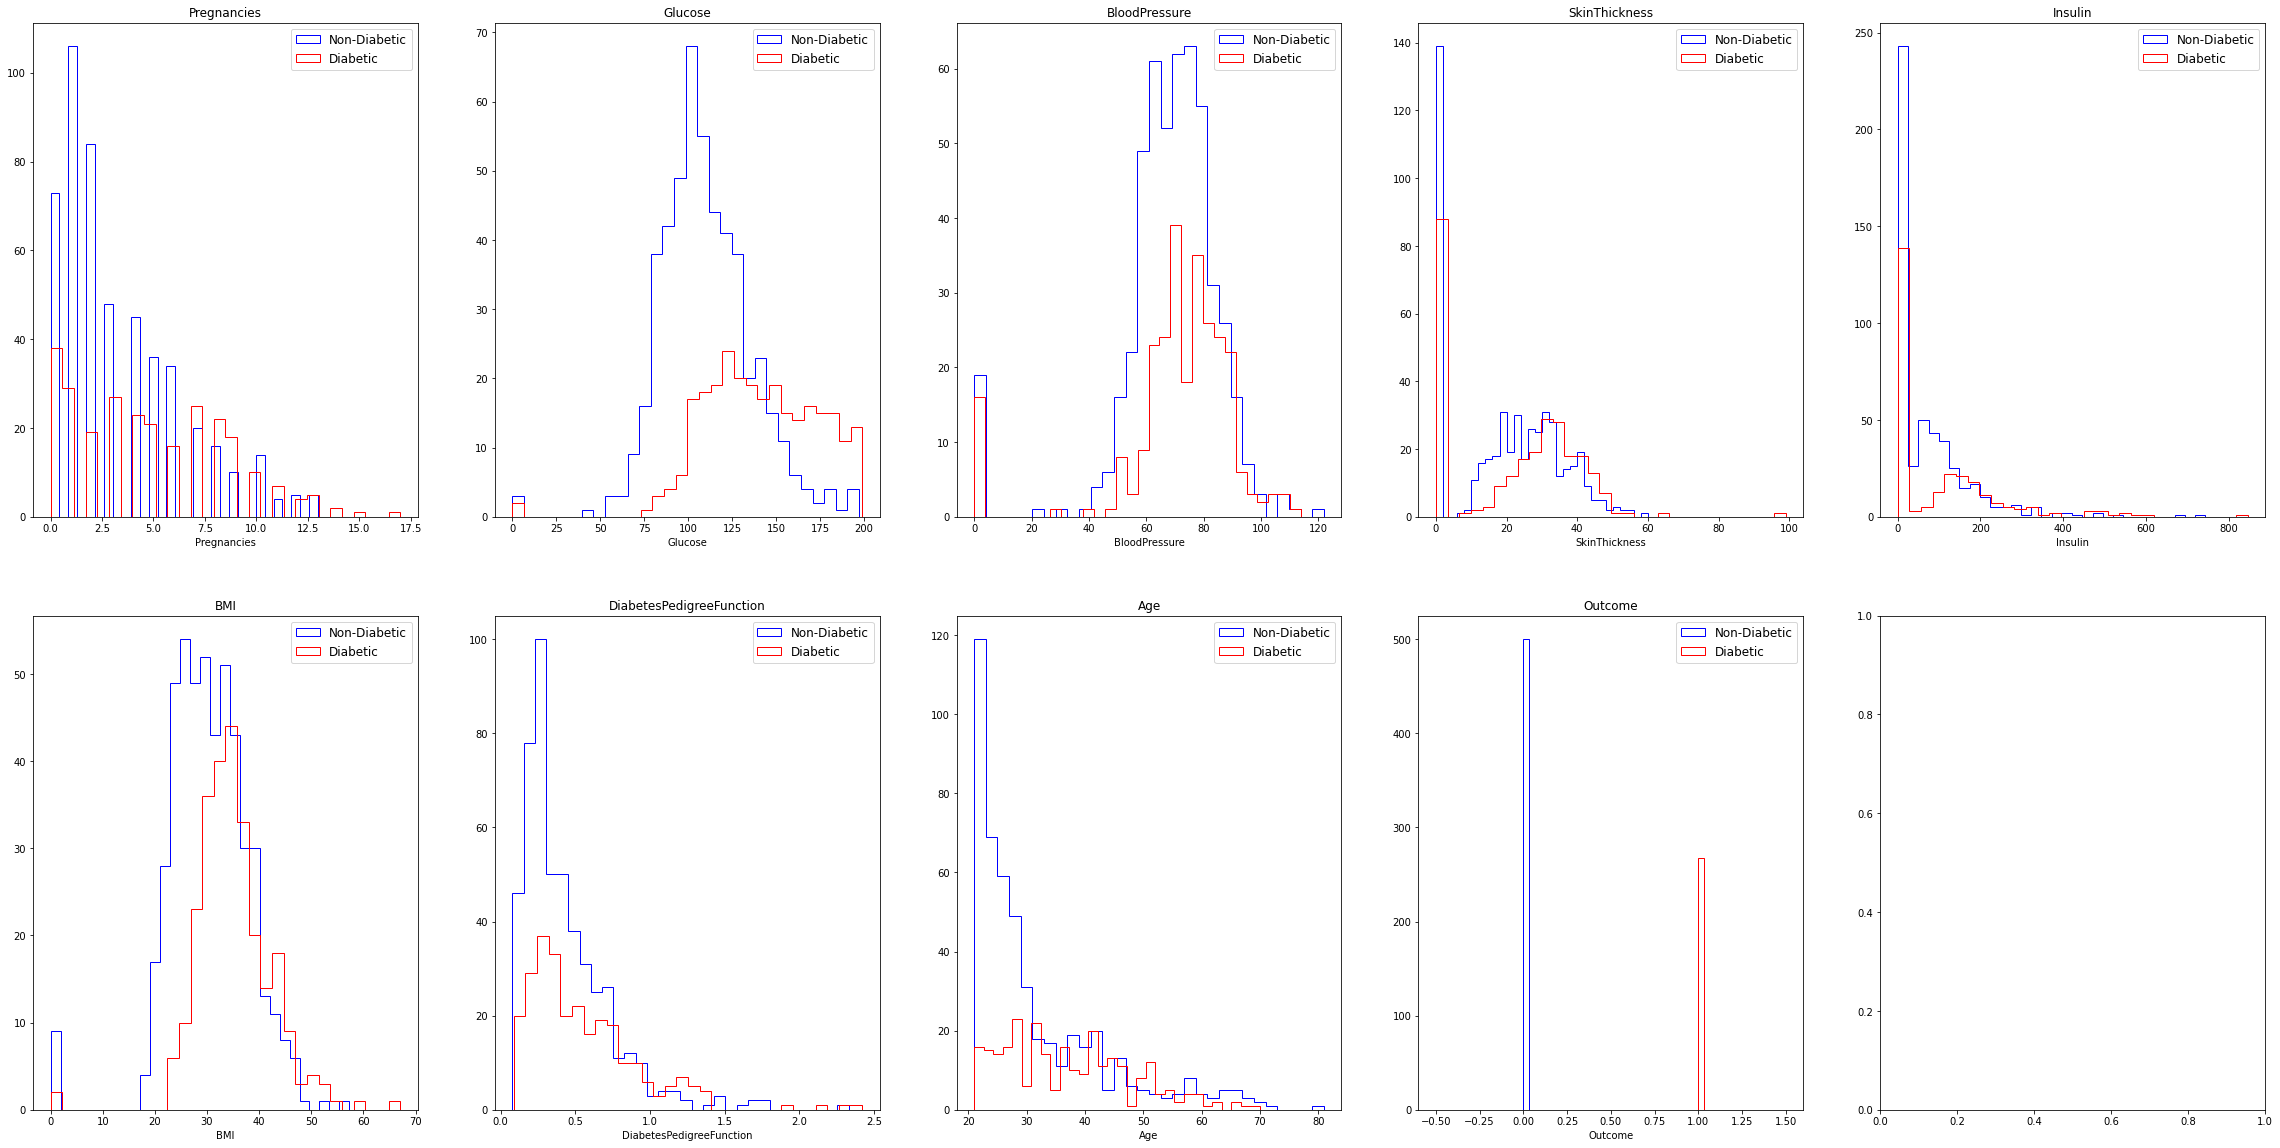

In [11]:
fig,ax = plt.subplots(2,5,figsize=(40,20))
a=0
ax = ax.ravel()
for i in range(9):
    ax[i].hist(df[df['Outcome']==0][col_list[a]],label='Non-Diabetic',bins=30,histtype='step',color='blue')
    ax[i].hist(df[df['Outcome']==1][col_list[a]], label='Diabetic',bins=30,histtype='step',color='red')
    ax[i].set_xlabel(col_list[a])
    ax[i].set_title(col_list[a])
    ax[i].legend(fontsize='large')
    a=a+1    
plt.savefig('hist_outcome_all.jpg')

In [12]:
import seaborn as sns

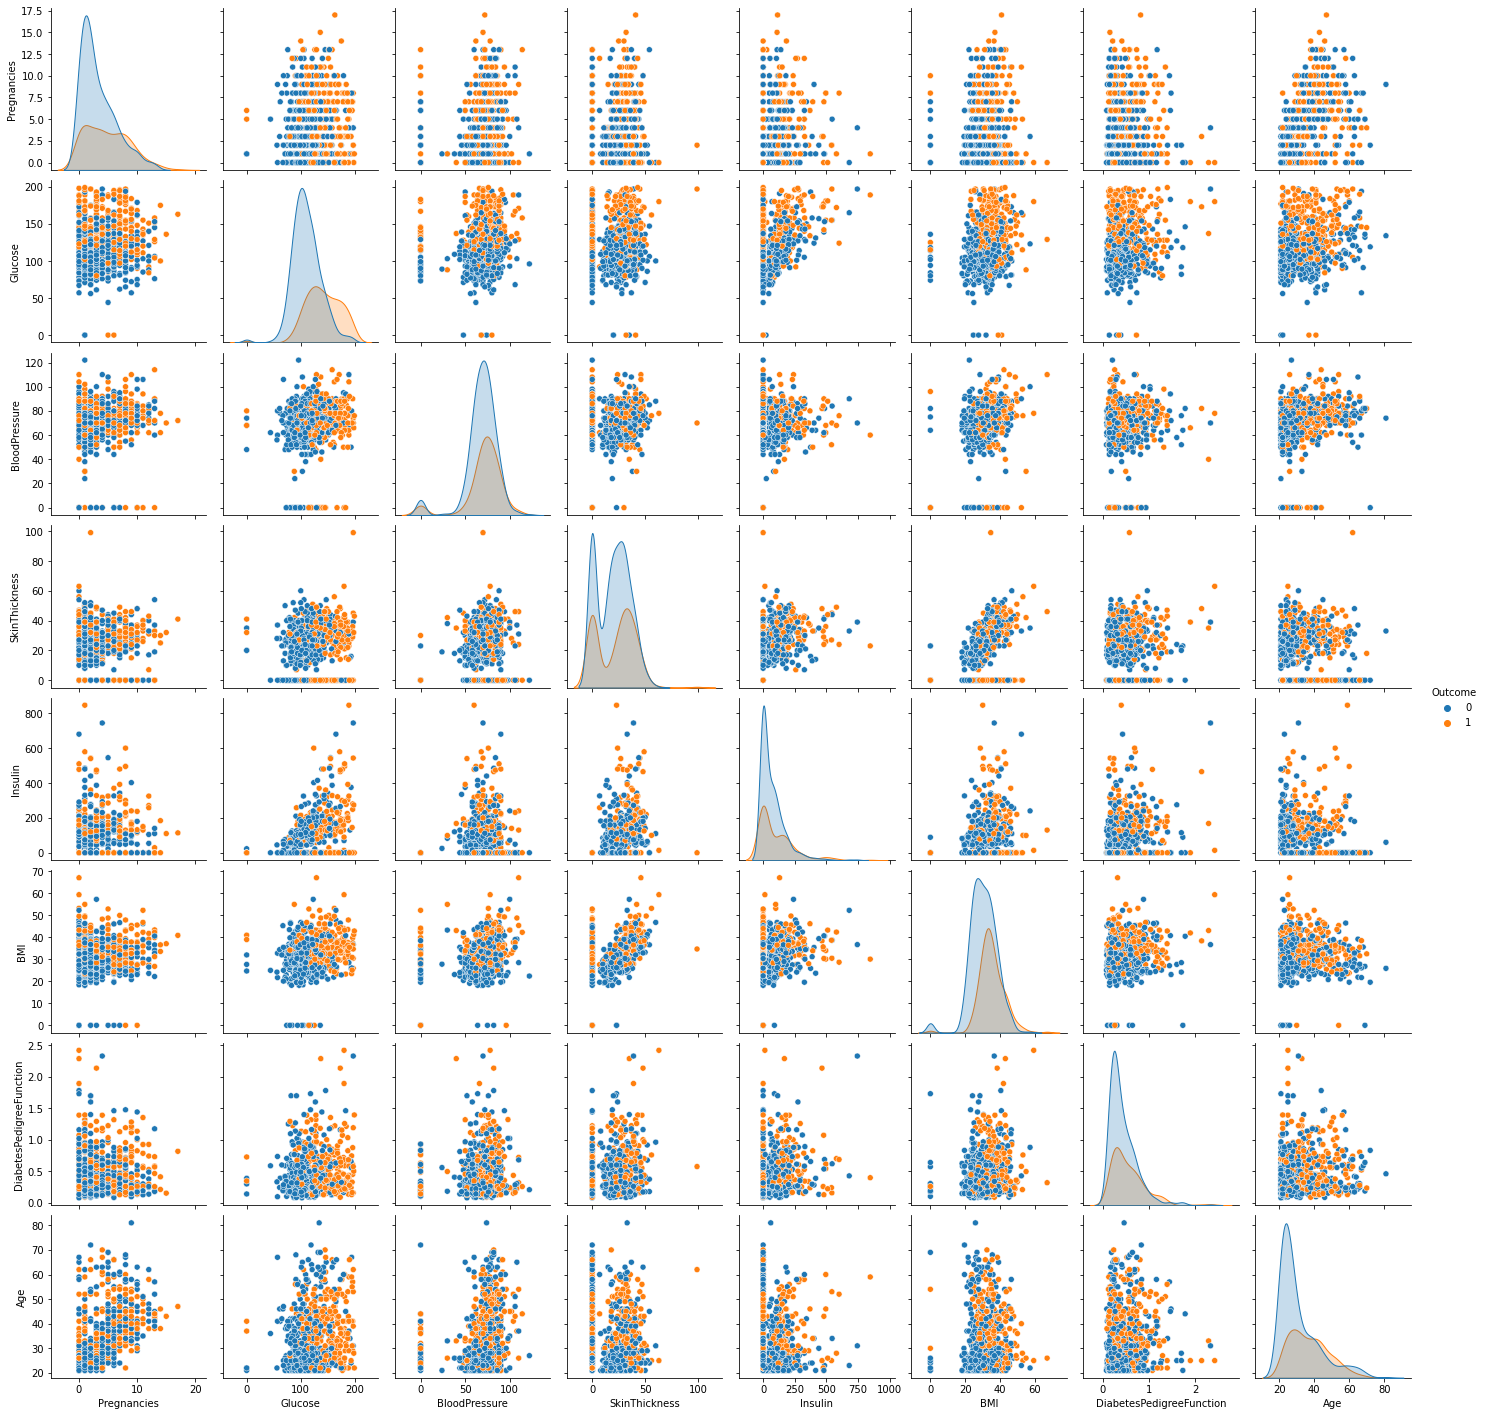

In [13]:
sns.pairplot(df,hue='Outcome')

What do we conclude from above distributions
* Glucose, Blood Pressure, BMI, Skin thickness and Insulin have zero values which doesn't make sense
* Zeros values are the missing values
* For the insulin and skin thickness we see very few large outliers
* Data frame contains more data for non-diabetic patients (outcome =0 ) compared to diabetic patients (outcome =1).
* paients with diabetes are almost half of patients without diabetes

In [14]:
# Spotting the ooutliers and missing values
# here enters common sense and domain knowledge
# from the output of describe and above histograms, we need to carefully check if the distributions make sense

## in our data following variables can't have zero value:

* BMI
* Insulin
* Skin thickness
* Blood pressure
* Glucose

Any of these zero means a person is dead <br>
It means these are missing values <br>
Let's see how many missing values does each of these columns have


In [15]:
# making a list of columns with missing values
ms_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
# write a function to check the missing values indicated by zero for the dataframe
def check_missing(df):
    print(f"{'feature name': <15}{'Missing Values':<20}{'% missing values':<10}")
    for i in ms_col:
        print(f"{i: <15}{(df[i]==0).sum():<20}{(((df[i]==0).sum())*100)/df.shape[0]: .2f}")


In [16]:
check_missing(df)

feature name   Missing Values      % missing values
Glucose        5                    0.65
BloodPressure  35                   4.56
SkinThickness  227                  29.56
Insulin        374                  48.70
BMI            11                   1.43


## What to do with these missing values ?
For the features Insulin, Skin Thickness a big fraction of values are missing <br>
We can't just delete the rows with missing values as it will remove a big chunk of data


## Let's first plot the  distribution of outcome for each feature when the value is misssing,
we want to check if they are not biased for a particular outcome, especially for insulin and skin thicknesss 

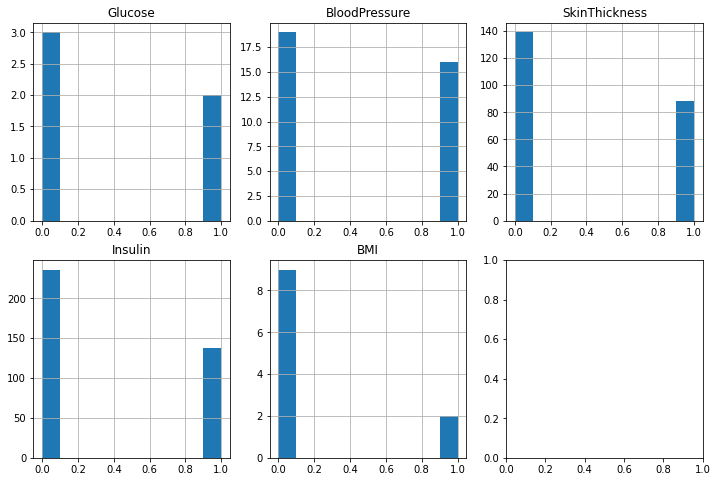

In [17]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
ax = ax.ravel()
j =0
for i in ms_col:
    df[df[i]==0]['Outcome'].hist(ax=ax[j])
    ax[j].set_title(i)
    j=j+1

* In both the cases, Skin thickness and insulin, the outcome 0 (no diabetes) has more missing data than outcome 1 (diabetes). 
* In fact the pattern is consistent for all the feature variables with misssing values
* Well this will be a wrong observation as the outcome 0 has overall more entries in the dataset
* The ratio of 0 and 1 in missing is same as the overall dataset 2:1

**Looking at correlation between the feature variables**

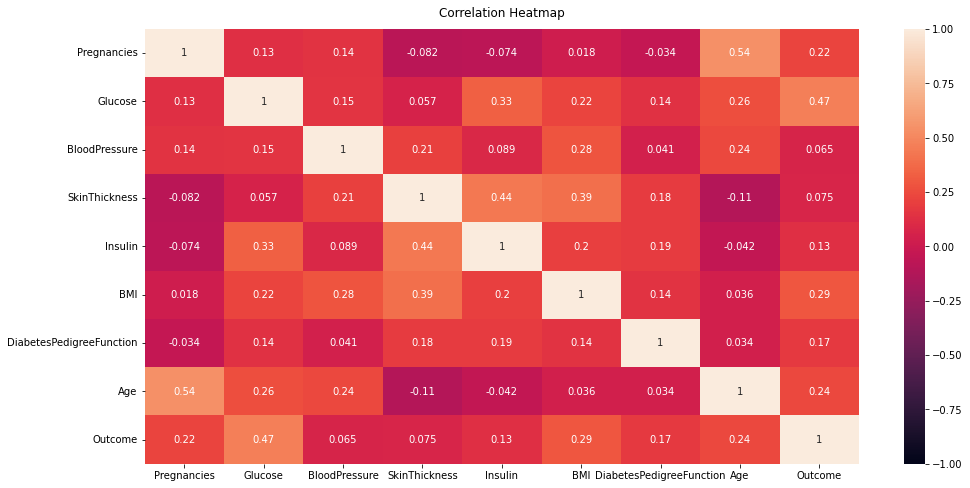

In [18]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# variables with large correlations to the outcome
* Glucose, BMI, AGE, Pregnancies and Insulin
* For insulin half of the values are missing so the correlation number doesn't give much information


## Strategy to proceed further
* split the dataframe into two dataframes
    * dfold_miss: one with each row having some missing values
    * dfold_nmiss : one wih no missing values
    
* make a train  test split 80:20 with stratify as true for the dfold_nmiss data
    * train dataset : 
    * test dataset: Will be used for final evaulation (free from any missing value treatment)
    
* merge the train set from above split with dfold_miss dataset
    * This will be the dataset we will use as our train (80% of it) and 1st test (20% of it)
    * For all the train test splits we have used stratify=y as the dataset is imbalance in the target variable
    

In [19]:
# copying the original dataframe to dfold
# From now on we will apply all our operations on this dataframe dfold
dfold = df.copy()

## XG Boost Classifier


In [20]:
#importing all the necessary libraries that we will need for classification using XG Boost

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
scaling_xt=StandardScaler()
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from xgboost import plot_importance


## Splitting the dataframe into one with missing values and other with no missing values

In [21]:
dfold_miss  = dfold[(dfold['Glucose']==0) | (dfold['BloodPressure']==0) | (dfold['SkinThickness']==0)  | (dfold['Insulin']==0) | (dfold['BMI']==0)]
dfold_nmiss = dfold[(dfold['Glucose']!=0) & (dfold['BloodPressure']!=0) & (dfold['SkinThickness']!=0)  & (dfold['Insulin']!=0) & (dfold['BMI']!=0)]


### Performing some cross checks to confirm if the splitting worked as expected
### always do cross checks in data analysis

In [22]:
## the sum of size of two sub dataframe should be equal to the original one
print('size of dataframe with missing values ',dfold_miss.shape[0])
print('size of dataframe with no missing values ',dfold_nmiss.shape[0])
print('size of original dataframe ',dfold.shape[0], ' sum of two sub dataframes is ',dfold_miss.shape[0]+dfold_nmiss.shape[0] )


size of dataframe with missing values  376
size of dataframe with no missing values  392
size of original dataframe  768  sum of two sub dataframes is  768


In [23]:
# Lets see the missing values in dataset with no missing values
# we expect zero
check_missing(dfold_nmiss)

feature name   Missing Values      % missing values
Glucose        0                    0.00
BloodPressure  0                    0.00
SkinThickness  0                    0.00
Insulin        0                    0.00
BMI            0                    0.00


In [24]:
#checking in n missing dataset
# for this we expect insulin have very large missing values close to 100%
check_missing(dfold_miss)

feature name   Missing Values      % missing values
Glucose        5                    1.33
BloodPressure  35                   9.31
SkinThickness  227                  60.37
Insulin        374                  99.47
BMI            11                   2.93


In [25]:
## let's separate the no missing dataset into feature matrix and target variable
Xnmiss=dfold_nmiss.drop('Outcome',axis=1)
Ynmiss=dfold_nmiss['Outcome']

In [26]:
## lets do a train_test_split for the non missing dataset

X_train_nmiss,X_test_nmiss,Y_train_nmiss,Y_test_nmiss =  train_test_split(Xnmiss,Ynmiss,test_size=0.20, random_state=7,stratify=Ynmiss)


### cross checks

In [27]:
sum(Y_test_nmiss==0)


53

In [28]:
# lets check if the stratify did what we expect i.e. the ratio of 0 and 1 in train and test will be same
print('ratio of 0 and 1 in the test set is ',sum(Y_test_nmiss==0)/sum(Y_test_nmiss==1))
print('ratio of 0 and 1 in the train set is ',sum(Y_train_nmiss==0)/sum(Y_train_nmiss==1))


ratio of 0 and 1 in the test set is  2.0384615384615383
ratio of 0 and 1 in the train set is  2.0096153846153846


* great stratify worked as expected

In [29]:
## lets merge the X_train_nmiss and Y_train_nmiss as a dataframe
df_train_nmiss = pd.concat([X_train_nmiss,Y_train_nmiss], axis=1)

In [30]:
print('shape of nmiss train data is ',df_train_nmiss.shape)

shape of nmiss train data is  (313, 9)


In [31]:
## lets concat the missing and n miss train dataframe
df_train_all = pd.concat([df_train_nmiss,dfold_miss], axis=0)

In [32]:
#lets check the number of missing values in this dataset
check_missing(df_train_all)
# we expect the values to be same in number as original dataframe/

feature name   Missing Values      % missing values
Glucose        5                    0.73
BloodPressure  35                   5.08
SkinThickness  227                  32.95
Insulin        374                  54.28
BMI            11                   1.60


## Strategy to deal with the missing values
* Lets replace the missing values:
    * For a column A we will replace the missing values as following: 
        * In a given row, we will replace the missing value depending on the target value
        * If the target value is 0 , we replace it with the median of the non missing entries in column A with target value 0
        * If the target value is 1 , we replace it with the median of the non missing entries in column A with target value 1


In [33]:
# save a copy for cross check before missing values treatment
df_train_all_check = df_train_all.copy()

In [34]:
## lets treat the missing values
for i in ms_col:
    df_train_all.loc[(df_train_all['Outcome']==0) & (df_train_all[i]==0), i] = df_train_all[(df_train_all['Outcome']==0) & (df_train_all[i]!=0)][i].median()
    df_train_all.loc[(df_train_all['Outcome']==1) & (df_train_all[i]==0), i] = df_train_all[(df_train_all['Outcome']==1) & (df_train_all[i]!=0)][i].median()

In [35]:
#lets check if the missing values are gone
check_missing(df_train_all)

feature name   Missing Values      % missing values
Glucose        0                    0.00
BloodPressure  0                    0.00
SkinThickness  0                    0.00
Insulin        0                    0.00
BMI            0                    0.00


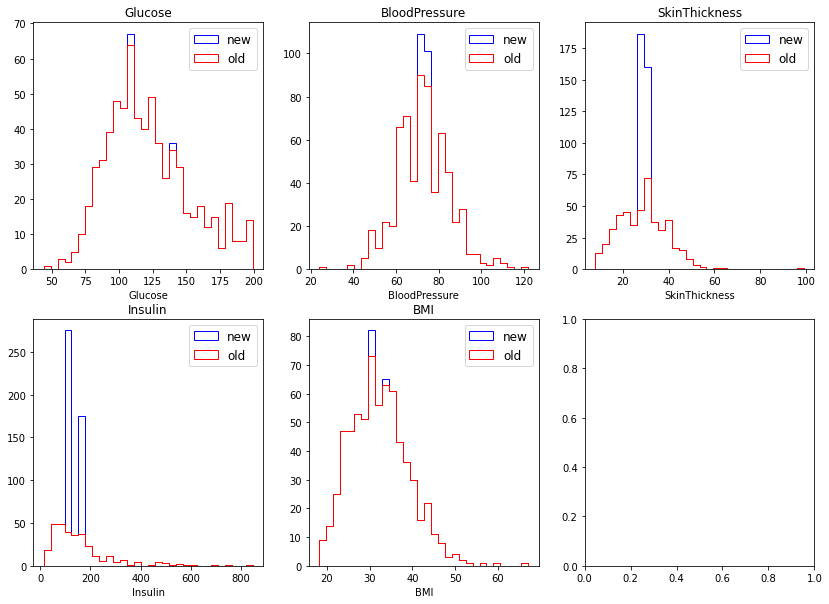

In [36]:
# Let's plot the distribtion of variables with missing values before and after treating the missing values
# for distributions before we won't plot the zero bin
fig,ax = plt.subplots(2,3,figsize=(14,10))
a=0
ax = ax.ravel()
for i in range(5):
    ax[i].hist(df_train_all[ms_col[a]],label='new',bins=30,histtype='step',color='blue')
    ax[i].hist(df_train_all_check[df_train_all_check[ms_col[a]]!=0][ms_col[a]], label='old',bins=30,histtype='step',color='red')
    ax[i].set_xlabel(ms_col[a])
    ax[i].set_title(ms_col[a])
    ax[i].legend(fontsize='large')
    a=a+1    

In [37]:
# ! COOL

## Time for training the XGBoost

In [38]:
# Lets make feature matrix and target vector from our train dataframe
Xt=df_train_all.drop('Outcome',axis=1)
Yt=df_train_all['Outcome']
#scaling_xt=StandardScaler()
# we will be using scaling_xt for doing a standard scaling of our feature matrix X


In [39]:
# lets split this data into train and test 80:20 with stratify
Xt_train,Xt_test,Yt_train,Yt_test = train_test_split(Xt,Yt,test_size=0.20, random_state=7,stratify=Yt)

# let's scale our X matrix train and test
Xt_train=scaling_xt.fit_transform(Xt_train)
Xt_test=scaling_xt.fit_transform(Xt_test)

#XBoost classifier
model1f = XGBClassifier(eval_metric='logloss')
model1f.fit(Xt_train,Yt_train)

# calculating the accuracy scores on train and test
print("Accuracy score from train set is ",model1f.score(Xt_train, Yt_train))
print("Accuracy score from test set is ",model1f.score(Xt_test, Yt_test))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy score from train set is  1.0
Accuracy score from test set is  0.8188405797101449


### Overfitting 

### Lets do a score check on our holdout test sample

In [40]:
# lets do the scling for left out test sample
X_test_nmiss=scaling_xt.fit_transform(X_test_nmiss)

In [41]:
# let's test it on the left out test sample

print('score on hold out test sample is ',model1f.score(X_test_nmiss, Y_test_nmiss))

score on hold out test sample is  0.7974683544303798


## Plotting the feature importance

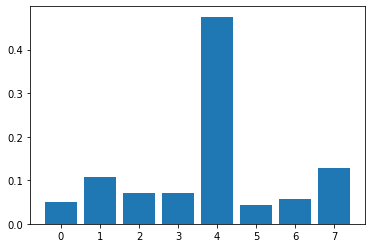

In [42]:
plt.bar(range(len(model1f.feature_importances_)), model1f.feature_importances_)
plt.show()


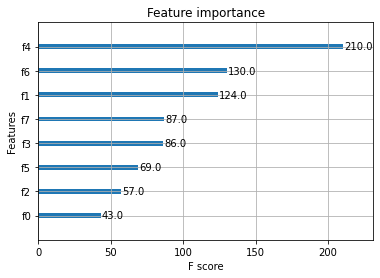

In [43]:
plot_importance(model1f)
plt.show()


In [44]:
modelt = XGBClassifier(eval_metric='logloss')
kfoldt = KFold(n_splits=5, shuffle=True, random_state=42)
resultst = cross_val_score(modelt, Xt, Yt, cv=kfoldt)
print(resultst)
print("Accuracy: %.2f%% (%.2f%%)" % (resultst.mean()*100, resultst.std()*100))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0.89130435 0.89855072 0.87681159 0.89130435 0.88321168]
Accuracy: 88.82% (0.75%)


## Dealing with Overfitting from XGBoost

In [45]:
eval_set = [(Xt_train, Yt_train), (Xt_test, Yt_test)]
model1f.fit(Xt_train, Yt_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)



[0]	validation_0-error:0.05626	validation_0-logloss:0.49124	validation_1-error:0.20290	validation_1-logloss:0.56287
[1]	validation_0-error:0.03993	validation_0-logloss:0.36942	validation_1-error:0.21014	validation_1-logloss:0.52107
[2]	validation_0-error:0.03993	validation_0-logloss:0.29072	validation_1-error:0.23188	validation_1-logloss:0.50175
[3]	validation_0-error:0.02541	validation_0-logloss:0.23396	validation_1-error:0.25362	validation_1-logloss:0.50143
[4]	validation_0-error:0.02178	validation_0-logloss:0.19456	validation_1-error:0.21014	validation_1-logloss:0.47045
[5]	validation_0-error:0.01996	validation_0-logloss:0.16354	validation_1-error:0.20290	validation_1-logloss:0.47554
[6]	validation_0-error:0.01815	validation_0-logloss:0.13930	validation_1-error:0.20290	validation_1-logloss:0.44598
[7]	validation_0-error:0.01089	validation_0-logloss:0.12128	validation_1-error:0.18116	validation_1-logloss:0.45171
[8]	validation_0-error:0.01270	validation_0-logloss:0.10597	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

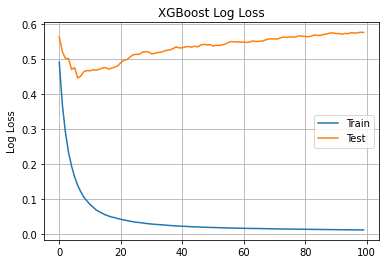

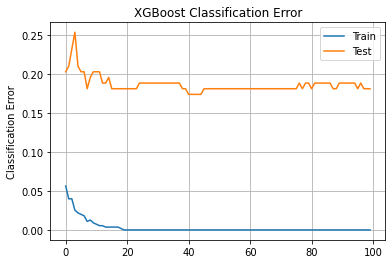

In [46]:
results = model1f.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.grid()
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.grid()
plt.show()

In [47]:

eval_set = [(Xt_test, Yt_test)]
model1f.fit(Xt_train, Yt_train, early_stopping_rounds=44, eval_metric="logloss", eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.56287
[1]	validation_0-logloss:0.52107
[2]	validation_0-logloss:0.50175
[3]	validation_0-logloss:0.50143
[4]	validation_0-logloss:0.47045
[5]	validation_0-logloss:0.47554
[6]	validation_0-logloss:0.44598
[7]	validation_0-logloss:0.45171
[8]	validation_0-logloss:0.46438
[9]	validation_0-logloss:0.46724
[10]	validation_0-logloss:0.46673
[11]	validation_0-logloss:0.46969
[12]	validation_0-logloss:0.46844
[13]	validation_0-logloss:0.47086
[14]	validation_0-logloss:0.47459
[15]	validation_0-logloss:0.47595
[16]	validation_0-logloss:0.47156
[17]	validation_0-logloss:0.47410
[18]	validation_0-logloss:0.47708
[19]	validation_0-logloss:0.48087
[20]	validation_0-logloss:0.48978
[21]	validation_0-logloss:0.49687
[22]	validation_0-logloss:0.49841
[23]	validation_0-logloss:0.50582
[24]	validation_0-logloss:0.51227
[25]	validation_0-logloss:0.51369
[26]	validation_0-logloss:0.51350
[27]	validation_0-logloss:0.51978
[28]	validation_0-logloss:0.52131
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
print("Accuracy score from train set is ",model1f.score(Xt_train, Yt_train))
print("Accuracy score from test set is ",model1f.score(Xt_test, Yt_test))

Accuracy score from train set is  0.9818511796733213
Accuracy score from test set is  0.7971014492753623


In [49]:
print('score on hold out test sample is ',model1f.score(X_test_nmiss, Y_test_nmiss))

score on hold out test sample is  0.7848101265822784
